In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
movies = pd.read_csv('2013_movies.csv')

In [3]:
#filling in NaN budget values
movies.loc[6, 'Budget'] = 200000000
movies.loc[7, 'Budget'] = 191200000
movies.loc[66, 'Budget'] = 25000000
movies.loc[67, 'Budget'] = 37000000
movies.loc[73, 'Budget'] = 5000000
movies.loc[74, 'Budget'] = 35000000
movies.loc[78, 'Budget'] = 37000000
movies.loc[83, 'Budget'] = 20000000
movies.loc[85, 'Budget'] = 18000000
movies.loc[86, 'Budget'] = 2500000
movies.loc[87, 'Budget'] = 30000000

In [4]:
movies.Budget.isnull().value_counts()

False    100
Name: Budget, dtype: int64

# Challenge 1 - Plot Domestic Total Gross over Time

In [5]:
#change releasedate to datetime in order to track time
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'],
                                       format="%Y/%m/%d %H:%M:%S")

In [6]:
type(movies.loc[0, 'ReleaseDate'])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
#converting values to millions of dollars for easier reading of data
movies['DomesticTotalGross'] = movies['DomesticTotalGross'].divide(1000000)
movies['Budget'] = movies['Budget'].divide(1000000)
movies

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130.0,424.668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200.0,409.013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150.0,400.738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76.0,368.061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225.0,291.045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100.0,274.092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,200.0,268.492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,191.2,258.366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160.0,238.679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215.0,234.911825,Sam Raimi,PG,127,2013-03-08


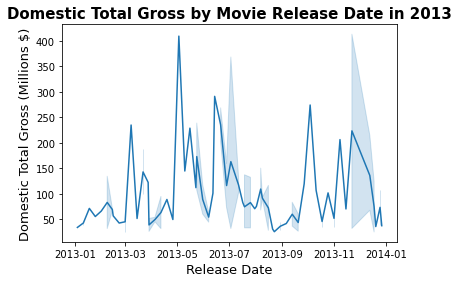

<Figure size 720x360 with 0 Axes>

In [8]:
release = sns.lineplot(x='ReleaseDate', y='DomesticTotalGross', data=movies)
release.set_ylabel('Domestic Total Gross (Millions $)', fontsize=13)
release.set_xlabel('Release Date', fontsize=13)
release.axes.set_title('Domestic Total Gross by Movie Release Date in 2013',
                       fontsize=15,
                       weight='bold')
plt.figure(figsize=(10, 5))
sns.despine()
plt.tight_layout()

# Challenge 2 - Plot Runtime vs. Domestic Total Gross

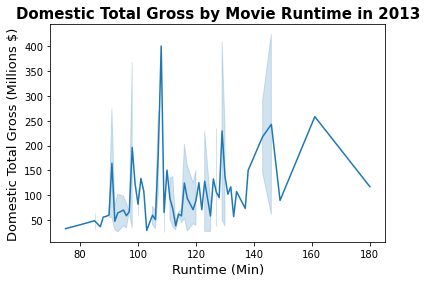

<Figure size 720x360 with 0 Axes>

In [9]:
runtime = sns.lineplot(x='Runtime', y='DomesticTotalGross', data=movies)
runtime.set_ylabel('Domestic Total Gross (Millions $)', fontsize=13)
runtime.set_xlabel('Runtime (Min)', fontsize=13)
runtime.axes.set_title('Domestic Total Gross by Movie Runtime in 2013',
                       fontsize=15,
                       weight='bold')
plt.figure(figsize=(10, 5))
sns.despine()
plt.tight_layout()

# Challenge 3 - Group Data by Rating

In [10]:
movies.groupby(['Rating'])['Runtime', 'DomesticTotalGross'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Runtime,DomesticTotalGross
Rating,,
G,107.000000,268.492764
PG,99.933333,131.135716
PG-13,117.510638,111.449769
R,110.729730,69.892429


# Challenge 4 - Subplots

In [11]:
movies[(movies['Rating']=='G')]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,200.0,268.492764,Dan Scanlon,G,107,2013-06-21


In [12]:
#number of MPAA ratings
N = 4

In [13]:
# new_x = movies.ReleaseDate
# new_y = movies.DomesticTotalGross

# plt.figure(figsize=[10,6])

# plt.suptitle('Main Title',fontsize = 16)

# plt.subplot(2,2,1)
# plt.plot(new_x,new_y)
# plt.title('Line Chart')

# plt.subplot(2,2,2)
# plt.plot(new_x,new_y)
# plt.title('Line Chart')

# plt.subplot(2,2,3)
# plt.plot(new_x,new_y)
# plt.title('Line Chart')

# plt.subplot(2,2,4)
# plt.plot(new_x,new_y)
# plt.title('Line Chart')

In [14]:
movies

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130.0,424.668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200.0,409.013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150.0,400.738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76.0,368.061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225.0,291.045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100.0,274.092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,200.0,268.492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,191.2,258.366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160.0,238.679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215.0,234.911825,Sam Raimi,PG,127,2013-03-08


In [16]:
type(movies.loc[0,'DomesticTotalGross'])

numpy.float64

# Challenge 5 - Director

In [17]:
#groupby directors
directors = movies.groupby(['Director']).DomesticTotalGross.sum()

In [18]:
#number of movies per director
movie_counts = movies.Director.value_counts()

In [19]:
#new columns for number of movies and gross per movie
directors_count = pd.concat([directors, movie_counts], axis=1)
directors_count.columns = ['totaldomesticgross', 'movies']
directors_count['grosspermovie'] = (directors_count.totaldomesticgross /
                                    directors_count.movies)

In [20]:
directors_count.grosspermovie.sort_values(ascending=False)

Francis Lawrence              424.668047
Shane Black                   409.013994
Chris BuckJennifer Lee        400.738009
Pierre CoffinChris Renaud     368.061265
Zack Snyder                   291.045518
Alfonso Cuaron                274.092705
Dan Scanlon                   268.492764
Peter Jackson                 258.366855
Justin Lin                    238.679850
Sam Raimi                     234.911825
J.J. Abrams                   228.778661
Alan Taylor                   206.362140
Marc Forster                  202.359711
Kirk De MiccoChris Sanders    187.168425
Paul Feig                     159.582188
Rawson Marshall Thurber       150.394119
David O. Russell              150.117807
Baz Luhrmann                  144.840419
Seth Gordon                   134.506920
Dennis Dugan                  133.668525
James Mangold                 132.556852
Adam McKay                    125.168368
Peter Berg                    125.095601
Jon Chu                       122.523060
Louis Leterrier 

**Francis Lawrence had the highest domestic gross per movie in 2013 at $424.67 million.**

# Challenge 6 - Domestic Total Gross by Month

In [21]:
#creating a month column and sorting by date
movies['month'] = movies['ReleaseDate'].dt.strftime('%b')
movies.sort_values(by='ReleaseDate', inplace=True)

<Figure size 720x360 with 0 Axes>

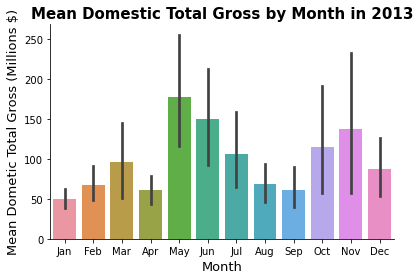

<Figure size 720x360 with 0 Axes>

In [22]:
ax = sns.barplot(x="month", y="DomesticTotalGross", data=movies)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Mean Dometic Total Gross (Millions $)', fontsize=13)
plt.title('Mean Domestic Total Gross by Month in 2013',
          fontsize=15,
          weight='bold')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(10, 5))